In [1]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import torch
from torch import nn

In [54]:
X, y = datasets.load_diabetes(return_X_y=True, scaled=False)
X = X[:, 2]

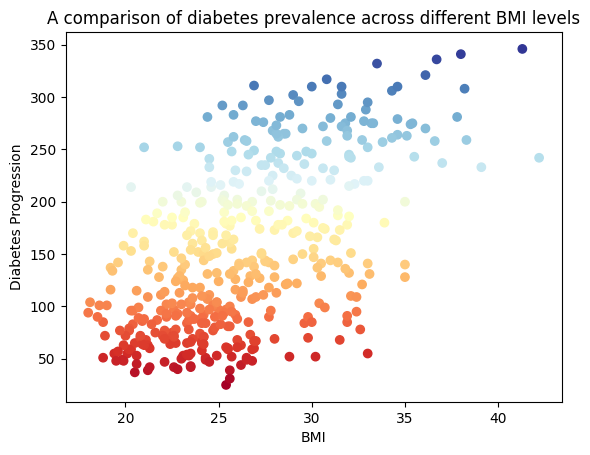

In [61]:
plt.scatter(x=X,y=y, c=y, cmap=plt.cm.RdYlBu)
plt.title("A comparison of diabetes prevalence across different BMI levels")
plt.xlabel("BMI")
plt.ylabel("Diabetes Progression")
plt.show()

In [56]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [58]:
len(X_train), len(X_test), len(y_train), len(y_test)

(353, 89, 353, 89)

In [66]:
def plot_predition(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels= y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") 
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data") 
    plt.title("A comparison of diabetes prevalence across different BMI levels")
    plt.xlabel("BMI")
    plt.ylabel("Diabetes Progression")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", label="Predictions") 

    plt.legend(prop={"size": 14})
    plt.show()

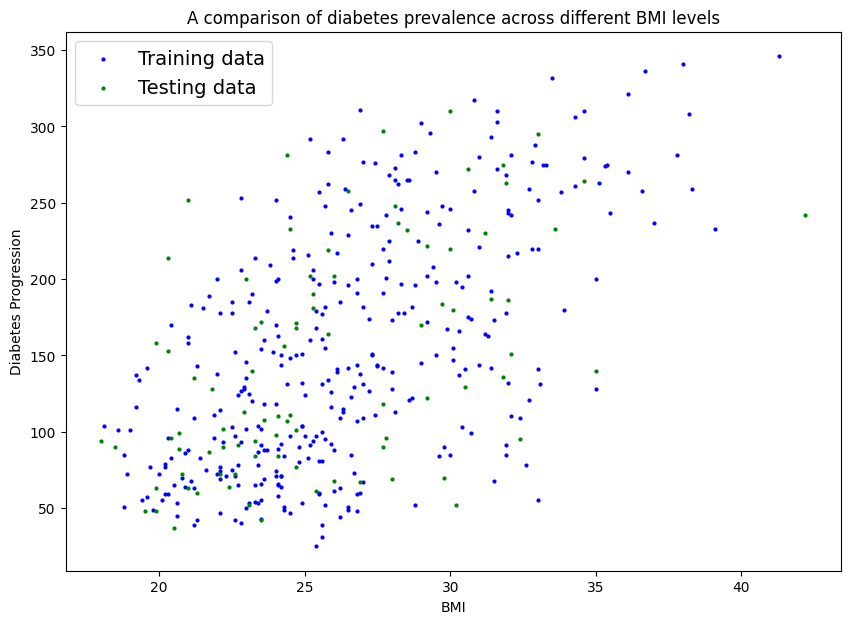

In [67]:
plot_predition(X_train, y_train, X_test, y_test)

A comparative analysis of two models implemented in PyTorch

In [69]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias
    

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [72]:
torch.manual_seed(20)
model_1 = LinearRegressionModel()
model_2 = LinearRegressionModelV2()

Choosing a Loss Function and Optimizer

In [73]:
loss_fn = nn.L1Loss()
loss_mse = nn.MSELoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),lr=0.001)